<a href="https://colab.research.google.com/github/DevPedroLimaB/data_processing/blob/main/data_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

urls = {
    "auditoria": "https://raw.githubusercontent.com/DevPedroLimaB/data_processing/main/auditoria.csv",
    "clientes": "https://raw.githubusercontent.com/DevPedroLimaB/data_processing/main/clientes",
    "funcionarios": "https://raw.githubusercontent.com/DevPedroLimaB/data_processing/main/funcionarios",
    "impostos": "https://raw.githubusercontent.com/DevPedroLimaB/data_processing/main/impostos",
    "itens_nf": "https://raw.githubusercontent.com/DevPedroLimaB/data_processing/main/itens_nf",
    "notas_fiscais": "https://raw.githubusercontent.com/DevPedroLimaB/data_processing/main/notas_fiscais"
    }

dfs = {name: pd.read_csv(url) for name, url in urls.items()}


for name, df in dfs.items():
    print(f"\nTratando {name}")

    df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")


    for col in df.columns:
        if df[col].dtype in [np.float64, np.int64]:
            df[col] = df[col].fillna(df[col].median())
        else:
            df[col] = df[col].fillna("Desconhecido")

    for col in df.columns:
        if 'data' in col:
            df[col] = pd.to_datetime(df[col], errors='coerce')

    dfs[name] = df
    display(df.head())




Tratando auditoria


,1,1.1,1.2,2025-02-01,aprovada,todos_os_valores_corretos
0,2,2,2,2025-02-05,pendente,Verificar cálculo do ICMS
1,3,3,1,2025-02-10,reprovada,Documento incompleto



Tratando clientes


,1,empresa_alpha,12.345.678/0001-90,"rua_a,_100",recife,pe,pessoa_jurídica,contato@alpha.com
0,2,Empresa Beta,98.765.432/0001-10,"Av. B, 200",Olinda,PE,Pessoa Jurídica,financeiro@beta.com
1,3,João Silva,123.456.789-10,"Rua C, 300",Recife,PE,Pessoa Física,joao@email.com
2,367,Empresa Delta,22.333.444/0001-55,"Rua F, 101",Recife,PE,Pessoa Jurídica,contato@delta.com
3,368,Empresa Epsilon,33.444.555/0001-66,"Av. G, 202",Olinda,PE,Pessoa Jurídica,financeiro@epsilon.com
4,369,Empresa Zeta,94.555.666/0001-77,"Rua H, 303",Recife,PE,Pessoa Jurídica,contato@zeta.com



Tratando funcionarios


,1,pedro_auditor,auditor,pedro@auditoria.com,81999999999
0,2,Ana Contadora,Contador,ana@auditoria.com,81988888888



Tratando impostos


,1,1.1,iss,5.00,75.00
0,2,2,ICMS,18.00,450.0
1,3,3,PIS,1.65,13.2



Tratando itens_nf


,1,1.1,serviço_de_consultoria,1.2,1500.00,1500.00.1
0,2,2,Produto X,10,250.0,2500.0
1,3,3,Serviço de Auditoria,1,800.0,800.0



Tratando notas_fiscais


,1,1.1,iss,5.00,75.00
0,2,2,ICMS,18.00,450.0
1,3,3,PIS,1.65,13.2


In [20]:
for name, df in dfs.items():
    print(f"\nValores faltantes - {name}:\n")
    display(df.isnull().sum())

    print(f"\nResumo estatístico - {name}:\n")
    display(df.describe(include='all'))



Valores faltantes - auditoria:



,0
1,0
1.1,0
1.2,0
2025-02-01,0
aprovada,0
todos_os_valores_corretos,0



Resumo estatístico - auditoria:



,1,1.1,1.2,2025-02-01,aprovada,todos_os_valores_corretos
count,2.000000,2.000000,2.000000,2,2,2
unique,NaN,NaN,NaN,2,2,2
top,NaN,NaN,NaN,2025-02-05,pendente,Verificar cálculo do ICMS
freq,NaN,NaN,NaN,1,1,1
mean,2.500000,2.500000,1.500000,NaN,NaN,NaN
std,0.707107,0.707107,0.707107,NaN,NaN,NaN
min,2.000000,2.000000,1.000000,NaN,NaN,NaN
25%,2.250000,2.250000,1.250000,NaN,NaN,NaN
50%,2.500000,2.500000,1.500000,NaN,NaN,NaN
75%,2.750000,2.750000,1.750000,NaN,NaN,NaN



Valores faltantes - clientes:



,0
1,0
empresa_alpha,0
12.345.678/0001-90,0
"rua_a,_100",0
recife,0
pe,0
pessoa_jurídica,0
contato@alpha.com,0



Resumo estatístico - clientes:



,1,empresa_alpha,12.345.678/0001-90,"rua_a,_100",recife,pe,pessoa_jurídica,contato@alpha.com
count,52.000000,52,52,52,52,52,52,52
unique,NaN,52,52,52,2,1,2,52
top,NaN,Empresa Beta,98.765.432/0001-10,"Av. B, 200",Recife,PE,Pessoa Jurídica,financeiro@beta.com
freq,NaN,1,1,1,27,52,26,1
mean,376.538462,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,76.877152,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,377.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,390.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,403.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Valores faltantes - funcionarios:



,0
1,0
pedro_auditor,0
auditor,0
pedro@auditoria.com,0
81999999999,0



Resumo estatístico - funcionarios:



,1,pedro_auditor,auditor,pedro@auditoria.com,81999999999
count,1.0,1,1,1,1.000000e+00
unique,NaN,1,1,1,NaN
top,NaN,Ana Contadora,Contador,ana@auditoria.com,NaN
freq,NaN,1,1,1,NaN
mean,2.0,NaN,NaN,NaN,8.198889e+10
std,NaN,NaN,NaN,NaN,NaN
min,2.0,NaN,NaN,NaN,8.198889e+10
25%,2.0,NaN,NaN,NaN,8.198889e+10
50%,2.0,NaN,NaN,NaN,8.198889e+10
75%,2.0,NaN,NaN,NaN,8.198889e+10



Valores faltantes - impostos:



,0
1,0
1.1,0
iss,0
5.00,0
75.00,0



Resumo estatístico - impostos:



,1,1.1,iss,5.00,75.00
count,2.000000,2.000000,2,2.000000,2.000000
unique,NaN,NaN,2,NaN,NaN
top,NaN,NaN,ICMS,NaN,NaN
freq,NaN,NaN,1,NaN,NaN
mean,2.500000,2.500000,NaN,9.825000,231.600000
std,0.707107,0.707107,NaN,11.561196,308.864242
min,2.000000,2.000000,NaN,1.650000,13.200000
25%,2.250000,2.250000,NaN,5.737500,122.400000
50%,2.500000,2.500000,NaN,9.825000,231.600000
75%,2.750000,2.750000,NaN,13.912500,340.800000



Valores faltantes - itens_nf:



,0
1,0
1.1,0
serviço_de_consultoria,0
1.2,0
1500.00,0
1500.00.1,0



Resumo estatístico - itens_nf:



,1,1.1,serviço_de_consultoria,1.2,1500.00,1500.00.1
count,2.000000,2.000000,2,2.000000,2.00000,2.000000
unique,NaN,NaN,2,NaN,NaN,NaN
top,NaN,NaN,Produto X,NaN,NaN,NaN
freq,NaN,NaN,1,NaN,NaN,NaN
mean,2.500000,2.500000,NaN,5.500000,525.00000,1650.000000
std,0.707107,0.707107,NaN,6.363961,388.90873,1202.081528
min,2.000000,2.000000,NaN,1.000000,250.00000,800.000000
25%,2.250000,2.250000,NaN,3.250000,387.50000,1225.000000
50%,2.500000,2.500000,NaN,5.500000,525.00000,1650.000000
75%,2.750000,2.750000,NaN,7.750000,662.50000,2075.000000



Valores faltantes - notas_fiscais:



,0
1,0
1.1,0
iss,0
5.00,0
75.00,0



Resumo estatístico - notas_fiscais:



,1,1.1,iss,5.00,75.00
count,2.000000,2.000000,2,2.000000,2.000000
unique,NaN,NaN,2,NaN,NaN
top,NaN,NaN,ICMS,NaN,NaN
freq,NaN,NaN,1,NaN,NaN
mean,2.500000,2.500000,NaN,9.825000,231.600000
std,0.707107,0.707107,NaN,11.561196,308.864242
min,2.000000,2.000000,NaN,1.650000,13.200000
25%,2.250000,2.250000,NaN,5.737500,122.400000
50%,2.500000,2.500000,NaN,9.825000,231.600000
75%,2.750000,2.750000,NaN,13.912500,340.800000


Dados carregados:


,id_nota,id_cliente,tipo_imposto,valor,aliquota,desconto
0,1,1,ISS,5.00,75.00,NaN
1,2,2,ICMS,18.00,450.00,NaN
2,3,3,PIS,1.65,13.20,NaN



📊 Totais por tipo de imposto:


,valor
tipo_imposto,
ICMS,18.00
ISS,5.00
PIS,1.65


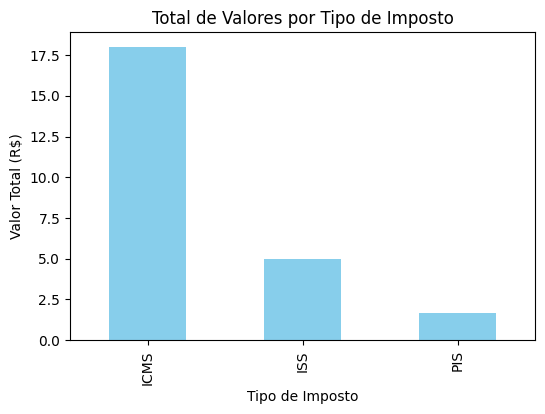

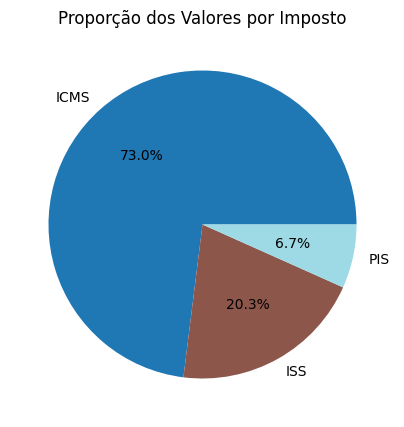

/tmp/ipython-input-4181585629.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="tipo_imposto", y="valor", data=nf, palette="Set2")


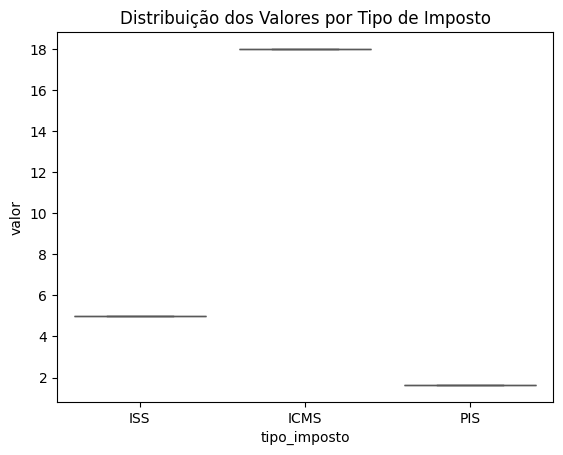

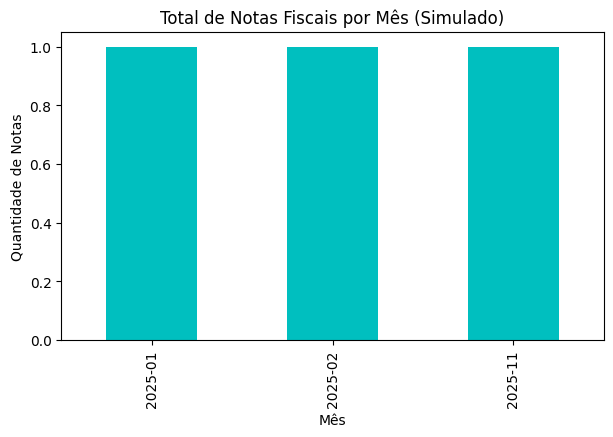

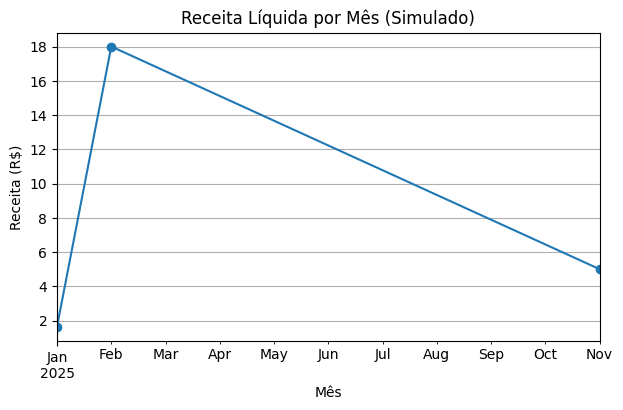

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

url_nf = "https://raw.githubusercontent.com/DevPedroLimaB/data_processing/main/notas_fiscais"

colunas_nf = ["id_nota", "id_cliente", "tipo_imposto", "valor", "aliquota", "desconto"]
nf = pd.read_csv(url_nf, sep=",", header=None, names=colunas_nf, dtype=str)

print("Dados carregados:")
display(nf.head())

nf['valor'] = pd.to_numeric(nf['valor'], errors='coerce')
nf['aliquota'] = pd.to_numeric(nf['aliquota'], errors='coerce')
nf['desconto'] = pd.to_numeric(nf['desconto'], errors='coerce')


nf = nf.fillna(0)

nf['data_emissao'] = pd.to_datetime(
    [f"2025-{random.randint(1,12):02d}-{random.randint(1,28):02d}" for _ in range(len(nf))]
)
nf['mes'] = nf['data_emissao'].dt.to_period('M')


print("\n📊 Totais por tipo de imposto:")
impostos_totais = nf.groupby("tipo_imposto")['valor'].sum()
display(impostos_totais)


impostos_totais.plot(kind='bar', color='skyblue', figsize=(6,4))
plt.title("Total de Valores por Tipo de Imposto")
plt.xlabel("Tipo de Imposto")
plt.ylabel("Valor Total (R$)")
plt.show()


impostos_totais.plot(kind='pie', autopct='%1.1f%%', figsize=(5,5), colormap="tab20")
plt.title("Proporção dos Valores por Imposto")
plt.ylabel("")
plt.show()


sns.boxplot(x="tipo_imposto", y="valor", data=nf, palette="Set2")
plt.title("Distribuição dos Valores por Tipo de Imposto")
plt.show()

notas_por_mes = nf.groupby('mes')['id_nota'].count()
notas_por_mes.plot(kind='bar', color='c', figsize=(7,4))
plt.title("Total de Notas Fiscais por Mês (Simulado)")
plt.xlabel("Mês")
plt.ylabel("Quantidade de Notas")
plt.show()


nf['receita_liquida'] = nf['valor'] - nf['desconto']
receita_mensal = nf.groupby('mes')['receita_liquida'].sum()

receita_mensal.plot(marker="o", figsize=(7,4))
plt.title("Receita Líquida por Mês (Simulado)")
plt.xlabel("Mês")
plt.ylabel("Receita (R$)")
plt.grid(True)
plt.show()
